# Proplems

### Largest Rectangle
https://www.hackerrank.com/challenges/largest-rectangle/problem?h_l=interview&playlist_slugs%5B%5D=interview-preparation-kit&playlist_slugs%5B%5D=stacks-queues

In [71]:
def get_min_index(h):
    return h.index(min(h)) # or np.argmin(h)

def largestRectangle(h):
    """ Time:  O(n*Ln(n))
        Space: O(Ln(n)) - recursion
    """
    n = len(h)
    if n == 1:
        return h[0]
    k = get_min_index(h)
    left_area = largestRectangle(h[:k]) if k > 0 else 0
    right_area = largestRectangle(h[k+1:]) if k < n-1 else 0
    total_area = n * h[k]
    return max([left_area, total_area, right_area])

In [44]:
h = [1, 2, 3, 4, 5] # 9
largestRectangle(h)

9

In [45]:
def largestRectangle(h):
    """ Time:  O(n*Ln(n))
        Space: O(Ln(n)) - queue
    """
    areas = []
    queue = [(0, len(h)-1)] # start, end
    while len(queue) > 0:
        start, end = queue.pop(0)
        if start == end:
            areas.append(h[start])
        elif start < end:
            min_idx = start + get_min_index(h[start:end+1])
            areas.append((end+1-start)*h[min_idx])
            if min_idx > start:
                queue.append((start, min_idx-1))
            if min_idx < end:
                queue.append((min_idx+1, end))
    return max(areas)

In [46]:
h = [1, 2, 3, 4, 5] # 9
largestRectangle(h)

9

### Balanced Brackets
https://www.hackerrank.com/challenges/balanced-brackets/problem?h_l=interview&playlist_slugs%5B%5D=interview-preparation-kit&playlist_slugs%5B%5D=stacks-queues

In [50]:
def isBalanced(s):
    # Write your code here
    brackets = [('(',')'), ('{','}'), ('[',']')]
    stack = []
    opens = [o for o, _ in brackets]
    for c in s:
        if c in opens:
            stack.append(c)
        elif len(stack)==0:
            return "NO"
        else:
            c0 = stack.pop()
            if not any([c0==c0_ and c_==c for c0_, c_ in brackets]):
                return "NO"
    return "YES" if len(stack)==0 else "NO"

In [51]:
test_cases = [
    ("{[()]}", "YES"),
    ("{[(])}", "NO"),
    ("{{[[(())]]}}", "YES")
]
for in_str, expected in test_cases:
    assert isBalanced(in_str) == expected

### Queues: A Tale of Two Stacks
https://www.hackerrank.com/challenges/ctci-queue-using-two-stacks/problem?h_l=interview&playlist_slugs%5B%5D=interview-preparation-kit&playlist_slugs%5B%5D=stacks-queues

In [69]:
class MyQueue(object):
    def __init__(self):
        self.stack1 = []
        self.stack2 = []
    
    def peek(self):
        while self.stack1:
            self.stack2.append(self.stack1.pop())
        return self.stack2[-1]
        
    def pop(self):
        while self.stack1:
            self.stack2.append(self.stack1.pop())
        return self.stack2.pop()
        
    def put(self, value):
        while self.stack2:
            self.stack1.append(self.stack2.pop())
        self.stack1.append(value)
    
    def print(self):
        print("stack1", self.stack1, "stack2", self.stack2)

In [70]:
q = MyQueue()
q.put(15); q.print()
q.put(17); q.print()
print(q.peek()); q.print()
q.put(25); q.print()
q.pop(); q.print()
print(q.peek()); q.print()
q.pop(); q.print()
print(q.peek()); q.print()

stack1 [15] stack2 []
stack1 [15, 17] stack2 []
15
stack1 [] stack2 [17, 15]
stack1 [15, 17, 25] stack2 []
stack1 [] stack2 [25, 17]
17
stack1 [] stack2 [25, 17]
stack1 [] stack2 [25]
25
stack1 [] stack2 [25]


### Highest Value Palindrome
https://www.hackerrank.com/challenges/richie-rich/problem

In [208]:
def highestValuePalindrome(s, n, k):
    ss = list(map(int, s))
    
    min_k = sum([1 for i in range(n//2) if ss[i] != ss[n-1-i]])
    if min_k > k:
        return '-1'
    
    for i in range(n//2):
        if ss[i] == 9 and ss[n-1-i] != 9:
            ss[n-1-i] = 9
            k -= 1
            min_k -= 1
        elif ss[i] != 9 and ss[n-1-i] == 9:
            ss[i] = 9
            k -= 1
            min_k -= 1
        elif ss[i] != 9 and ss[n-1-i] != 9:
            if ss[i] != ss[n-1-i]:
                if k - min_k >= 1:
                    ss[i] = ss[n-1-i] = 9
                    k -= 2
                    min_k -= 1
                elif ss[i] > ss[n-1-i]:
                    ss[n-1-i] = ss[i]
                    k -= 1
                    min_k -= 1
                else:
                    ss[i] = ss[n-1-i]
                    k -= 1
                    min_k -= 1
            elif k - min_k >= 2:
                ss[i] = ss[n-1-i] = 9
                k -= 2
    
    if k > 0 and n % 2 == 1:
        ss[n//2] = 9
    
    return ''.join(map(str, ss)) 

In [209]:
highestValuePalindrome(s='0011',n=4, k=1)

'-1'

### Min Max Riddle
https://www.hackerrank.com/challenges/min-max-riddle/problem?h_l=interview&playlist_slugs%5B%5D=interview-preparation-kit&playlist_slugs%5B%5D=stacks-queues

In [ ]:
def riddle(arr):
    # complete this function
    results = []
    n = len(arr)
    windows = arr.copy()
    for i in range(n):
        results.append(max(windows))
        

### Tic-Toc game on infinit board

In [120]:
import imutils
import cv2
import numpy as np
from pathlib import Path
from PIL import Image # Pillow
import six
import torchvision.transforms as transforms
toTensor = transforms.ToTensor()

def image_to_model_input(img):
    img = image_to_ndarray(img)
    img = resize(img, w=IMG_WIDTH, h=IMG_HEIGHT)
    img = toTensor(img)
    img = img.sub_(0.5).div_(0.5)
    return img

def to_Image(img):
    buf = six.BytesIO()
    buf.write(img)
    buf.seek(0)
    try:                
        img = Image.open(buf)
        if not self.rgb:
            img = img.convert('L')
    except IOError:
        print('Corrupted image for %d' % index)
        return self[index + 1]

def resize(img, w, h):
    """ Image resizing
    @param: w - Image width
    @param: h - Image height
    @return: image
    """
    if img.shape[0] == h and img.shape[1] == w:
        return img
    # interpolation - cv2.INTER_LINEAR (default) cv2.INTER_AREA cv2.INTER_CUBIC
    return cv2.resize(img, (w, h), interpolation=cv2.INTER_LINEAR)

In [198]:
def random_add_gaussian_blur(img, rad=None):
    if not rad:
        x = np.random.rand()
        rad = 1 if x<0.33 else 2 if x<0.66 else 3
    dist = 2 * round(rad + np.random.rand() * rad) + 1
    return cv2.GaussianBlur(img, (dist, dist), int(round(2 * np.random.rand())))

(64, 128, 3)


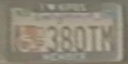

In [188]:
img = cv2.imread("/Users/silinskiy/mydata/image_transform/[DP]380TM_California_0.000.jpg", cv2.IMREAD_COLOR)
print(img.shape)
Image.fromarray(img)

(64, 128, 3)


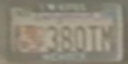

In [202]:
img2 = random_add_gaussian_blur(img)
print(img2.shape)
Image.fromarray(img2)

In [197]:
x = np.random.rand()
rad = 1 if x<0.33 else 2 if x<0.66 else 3
dist = 2 * round(rad + np.random.rand() * rad) + 1
dist

9

73.73802399191345
(281, 194, 3)


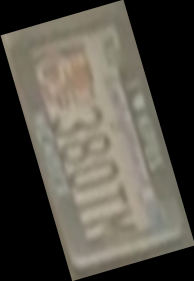

In [156]:
angle = np.random.rand() * 180
print(angle)
h, w = img.shape[0], img.shape[1]
out = resize(img, w*2, h*2)
out = imutils.rotate_bound(out, angle)
print(out.shape)
Image.fromarray(out)

In [157]:
s = list((np.round((np.array(out.shape) / 2))).astype(int))
s

[140, 97, 2]

In [34]:
wd = Path("/Users/silinskiy/mydata/image_transform")
od = wd.joinpath("transform")
for f in wd.glob("*.jpg"):
    out_path = od.joinpath(f.name)
    #img = cv2.imread(str(f), cv2.IMREAD_COLOR)
    
    img_bin = read_image(f)
    img = image_to_ndarray(img_bin)
    img = random_adding_shade(img)
    
    cv2.imwrite(str(out_path), img)
    print(f, ' => ', out_path)

/Users/silinskiy/mydata/image_transform/[DP]380TM_California_0.000.jpg  =>  /Users/silinskiy/mydata/image_transform/transform/[DP]380TM_California_0.000.jpg
/Users/silinskiy/mydata/image_transform/[DP]353LS_California_1.000.jpg  =>  /Users/silinskiy/mydata/image_transform/transform/[DP]353LS_California_1.000.jpg
/Users/silinskiy/mydata/image_transform/[DP]559ZS_California_1.000.jpg  =>  /Users/silinskiy/mydata/image_transform/transform/[DP]559ZS_California_1.000.jpg
/Users/silinskiy/mydata/image_transform/[AN]2035_New-York_0.3674.jpg  =>  /Users/silinskiy/mydata/image_transform/transform/[AN]2035_New-York_0.3674.jpg
